In this dataset we will find whether attrition is there or not in a company,so we will predict the result using logistic regression and other classification techniques

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('hr.csv',names=range(0,35),header=0)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
dtype: int64

In [5]:
df.dtypes

0      int64
1     object
2     object
3      int64
4     object
5      int64
6      int64
7     object
8      int64
9      int64
10     int64
11    object
12     int64
13     int64
14     int64
15    object
16     int64
17    object
18     int64
19     int64
20     int64
21    object
22    object
23     int64
24     int64
25     int64
26     int64
27     int64
28     int64
29     int64
30     int64
31     int64
32     int64
33     int64
34     int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1470 non-null   int64 
 1   1       1470 non-null   object
 2   2       1470 non-null   object
 3   3       1470 non-null   int64 
 4   4       1470 non-null   object
 5   5       1470 non-null   int64 
 6   6       1470 non-null   int64 
 7   7       1470 non-null   object
 8   8       1470 non-null   int64 
 9   9       1470 non-null   int64 
 10  10      1470 non-null   int64 
 11  11      1470 non-null   object
 12  12      1470 non-null   int64 
 13  13      1470 non-null   int64 
 14  14      1470 non-null   int64 
 15  15      1470 non-null   object
 16  16      1470 non-null   int64 
 17  17      1470 non-null   object
 18  18      1470 non-null   int64 
 19  19      1470 non-null   int64 
 20  20      1470 non-null   int64 
 21  21      1470 non-null   object
 22  22      1470 non-null   

In [7]:
df.shape

(1470, 35)

In [8]:
#changing catagorical to numerical values

In [9]:
df.tail()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [10]:
#df['1'] is our target variable which denotes whether attrition is yes or no

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
a=[1,2,4,7,11,15,17,21,22]

In [13]:
le=LabelEncoder()

In [14]:
for i in a:
    df[i]=le.fit_transform(df[i])
    

In [15]:
df.dtypes

0     int64
1     int32
2     int32
3     int64
4     int32
5     int64
6     int64
7     int32
8     int64
9     int64
10    int64
11    int32
12    int64
13    int64
14    int64
15    int32
16    int64
17    int32
18    int64
19    int64
20    int64
21    int32
22    int32
23    int64
24    int64
25    int64
26    int64
27    int64
28    int64
29    int64
30    int64
31    int64
32    int64
33    int64
34    int64
dtype: object

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [17]:
#seperating the target and data

In [18]:
x=df.drop(1,axis=1)

In [19]:
x.head()

,0,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [20]:
y=df[1].values

In [21]:
y=y.reshape(-1,1)

In [22]:
print(y.shape)
print(x.shape)

(1470, 1)
(1470, 34)


In [23]:
x

,0,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,41,2,1102,2,1,2,1,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,7,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,1,2061,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,1,2062,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,1,2064,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,1,2065,4,...,4,80,0,17,3,2,9,6,0,8


In [24]:
from sklearn.decomposition import PCA

In [25]:
#reducing the no of columns using principle component analysis
pca=PCA(n_components=9)
x=pca.fit_transform(x)

In [26]:
x=pd.DataFrame(data=x)
x

,0,1,2,3,4,5,6,7,8
0,5139.144002,-718.086191,-1047.618131,-246.007141,-29.136113,1.102347,-8.859410,-2.056756,-3.903956
1,10528.865129,-1802.653430,-1004.883381,565.245196,2.458596,12.782940,-2.587402,-0.036459,8.333865
2,-12089.425921,-3920.145490,-1048.000222,-488.847990,-25.899679,1.413627,-7.626811,-6.546913,-0.704657
3,8689.622047,-3949.517598,-1072.175400,-544.170543,9.364752,0.367456,-5.841633,4.627869,-4.249307
4,2192.360869,-3125.191133,-1012.117528,267.180275,24.634854,-7.528494,-5.877370,-1.019278,-3.540521
...,...,...,...,...,...,...,...,...,...
1465,-2181.024559,-3848.070666,1023.712248,-143.499755,26.296613,9.316218,12.645107,-1.124813,0.592091
1466,7281.771483,3191.212196,1044.998665,115.413126,24.497951,-4.114278,-3.080194,-1.207130,0.505281
1467,-9143.942850,9.825089,1087.283833,598.828898,-19.997605,-11.819731,-4.055396,0.575217,5.196230
1468,-1113.966963,-1070.216317,1023.786886,-282.395082,4.443784,14.364611,-9.443836,0.618717,-1.057915


In [27]:
#standardizing the data(std=1 and mean=1)
from sklearn.preprocessing import StandardScaler

In [28]:
std=StandardScaler()

In [29]:
x=std.fit_transform(x)
x=pd.DataFrame(data=x)

In [30]:
x

,0,1,2,3,4,5,6,7,8
0,0.721919,-0.152742,-1.739299,-0.611628,-1.434969,0.127072,-1.095062,-0.301818,-1.065103
1,1.479038,-0.383436,-1.668349,1.405324,0.121087,1.473537,-0.319814,-0.005350,2.273699
2,-1.698257,-0.833841,-1.739934,-1.215384,-1.275573,0.162954,-0.942708,-0.960725,-0.192249
3,1.220671,-0.840089,-1.780070,-1.352928,0.461219,0.042358,-0.722052,0.679115,-1.159323
4,0.307971,-0.664749,-1.680360,0.664269,1.213280,-0.867838,-0.726469,-0.149574,-0.965948
...,...,...,...,...,...,...,...,...,...
1465,-0.306378,-0.818510,1.699610,-0.356772,1.295122,1.073915,1.562991,-0.165060,0.161538
1466,1.022904,0.678792,1.734950,0.286942,1.206537,-0.474268,-0.380726,-0.177140,0.137854
1467,-1.284491,0.002090,1.805154,1.488820,-0.984893,-1.362504,-0.501265,0.084410,1.417669
1468,-0.156484,-0.227642,1.699734,-0.702096,0.218859,1.655862,-1.167300,0.090793,-0.288627


In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1470 non-null   float64
 1   1       1470 non-null   float64
 2   2       1470 non-null   float64
 3   3       1470 non-null   float64
 4   4       1470 non-null   float64
 5   5       1470 non-null   float64
 6   6       1470 non-null   float64
 7   7       1470 non-null   float64
 8   8       1470 non-null   float64
dtypes: float64(9)
memory usage: 103.5 KB


In [32]:
x.skew()

0    0.017840
1    1.371337
2    0.011219
3    0.006705
4    0.032057
5    0.512294
6    0.904769
7    0.147982
8    0.826519
dtype: float64

In [33]:
x.describe()

,0,1,2,3,4,5,6,7,8
count,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03,1.470000e+03
mean,3.172066e-17,2.496114e-17,1.625306e-16,3.028568e-17,-4.335157e-17,3.462838e-17,1.980653e-17,3.379761e-17,-1.193301e-17
std,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00,1.000340e+00
min,-1.739531e+00,-1.277553e+00,-1.780070e+00,-1.886741e+00,-1.740945e+00,-2.791177e+00,-1.441288e+00,-2.971615e+00,-1.554575e+00
25%,-8.694211e-01,-7.490470e-01,-8.866043e-01,-8.948375e-01,-8.722167e-01,-7.044790e-01,-8.098147e-01,-6.498222e-01,-7.990839e-01
50%,-6.413824e-03,-3.374077e-01,7.305669e-04,1.414226e-02,-4.454023e-03,-1.161668e-01,-2.896541e-01,-4.245814e-02,-2.953611e-01
75%,8.715816e-01,3.626925e-01,8.819311e-01,8.329883e-01,8.625932e-01,6.277866e-01,5.543947e-01,6.573432e-01,6.968026e-01
max,1.800362e+00,2.943616e+00,1.805154e+00,1.887406e+00,1.860464e+00,4.026730e+00,2.610976e+00,3.182980e+00,2.900039e+00


In [34]:
y

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [35]:
x.head()

,0,1,2,3,4,5,6,7,8
0,0.721919,-0.152742,-1.739299,-0.611628,-1.434969,0.127072,-1.095062,-0.301818,-1.065103
1,1.479038,-0.383436,-1.668349,1.405324,0.121087,1.473537,-0.319814,-0.005350,2.273699
2,-1.698257,-0.833841,-1.739934,-1.215384,-1.275573,0.162954,-0.942708,-0.960725,-0.192249
3,1.220671,-0.840089,-1.780070,-1.352928,0.461219,0.042358,-0.722052,0.679115,-1.159323
4,0.307971,-0.664749,-1.680360,0.664269,1.213280,-0.867838,-0.726469,-0.149574,-0.965948


In [36]:
#Data visualization using various techniques

In [37]:
from matplotlib import pyplot as plt
import seaborn as sns

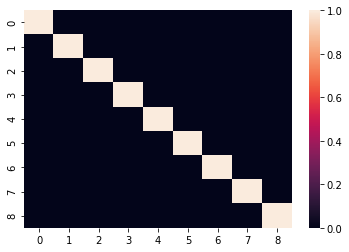

In [38]:
sns.heatmap(x.corr())

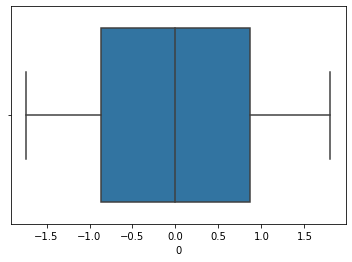

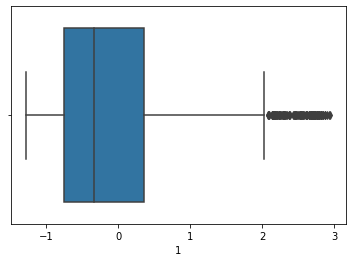

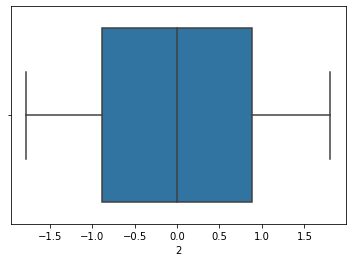

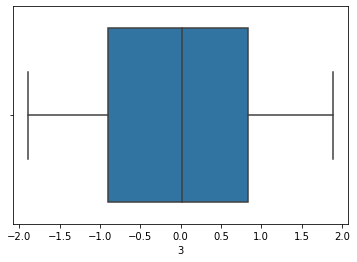

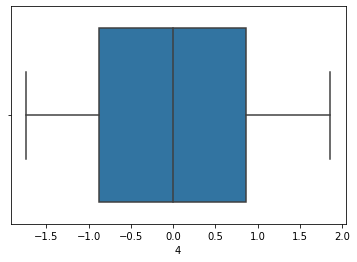

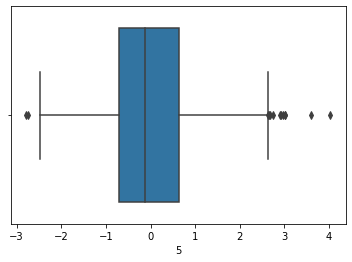

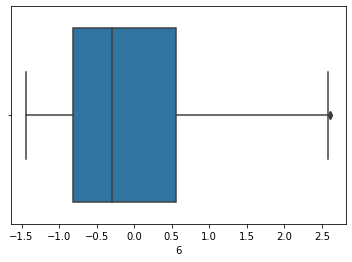

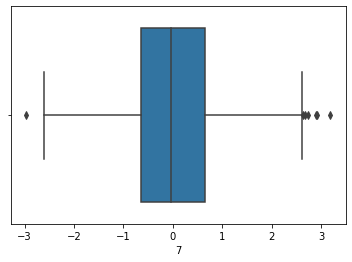

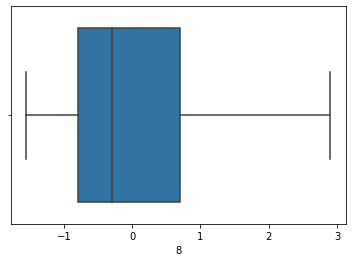

In [39]:
for i in x.columns:
    plt.figure()
    sns.boxplot(x[i])       # shows that some of the columns contain outliers

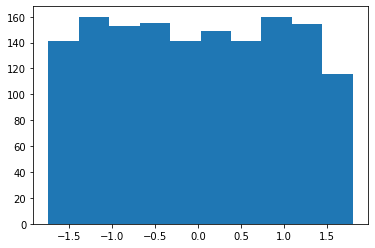

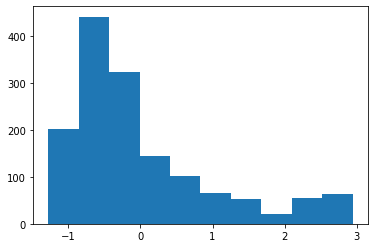

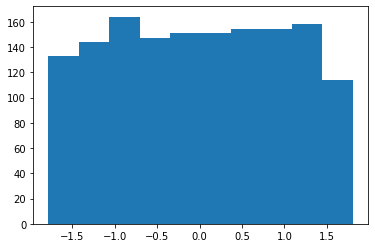

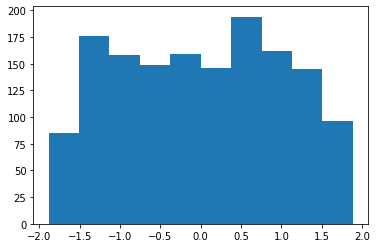

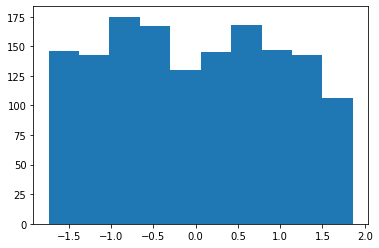

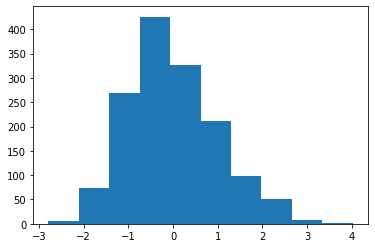

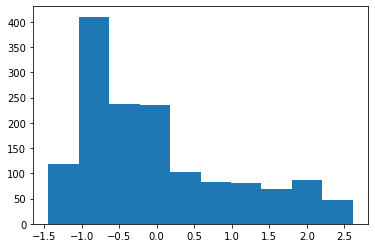

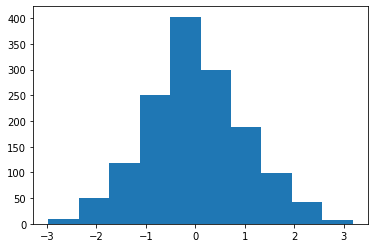

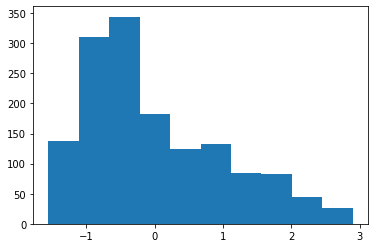

In [40]:
for i in x.columns:
    plt.figure()
    plt.hist(x[i])

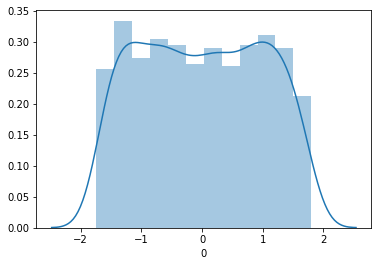

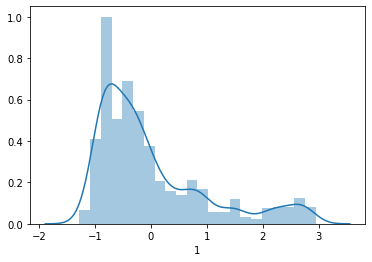

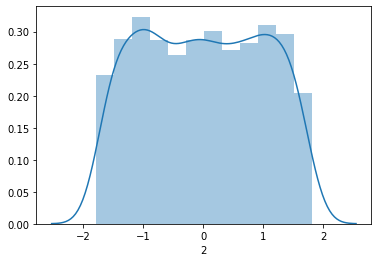

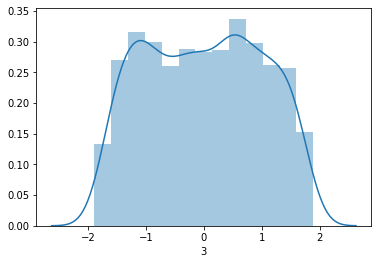

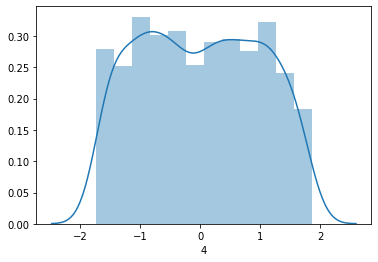

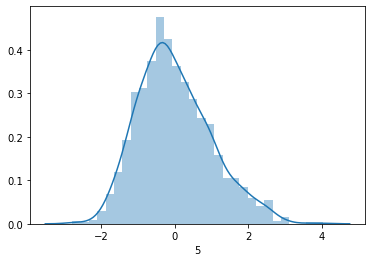

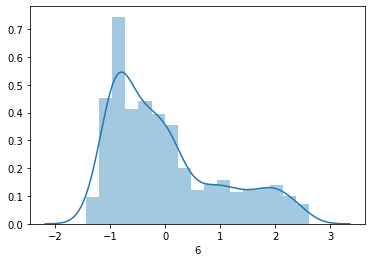

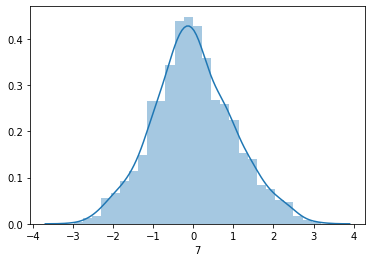

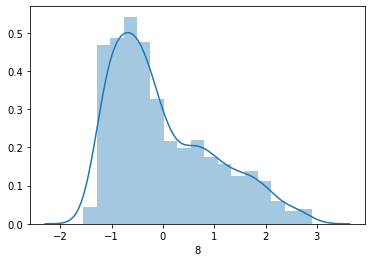

In [41]:
for i in x.columns:
    plt.figure()
    sns.distplot(x[i])

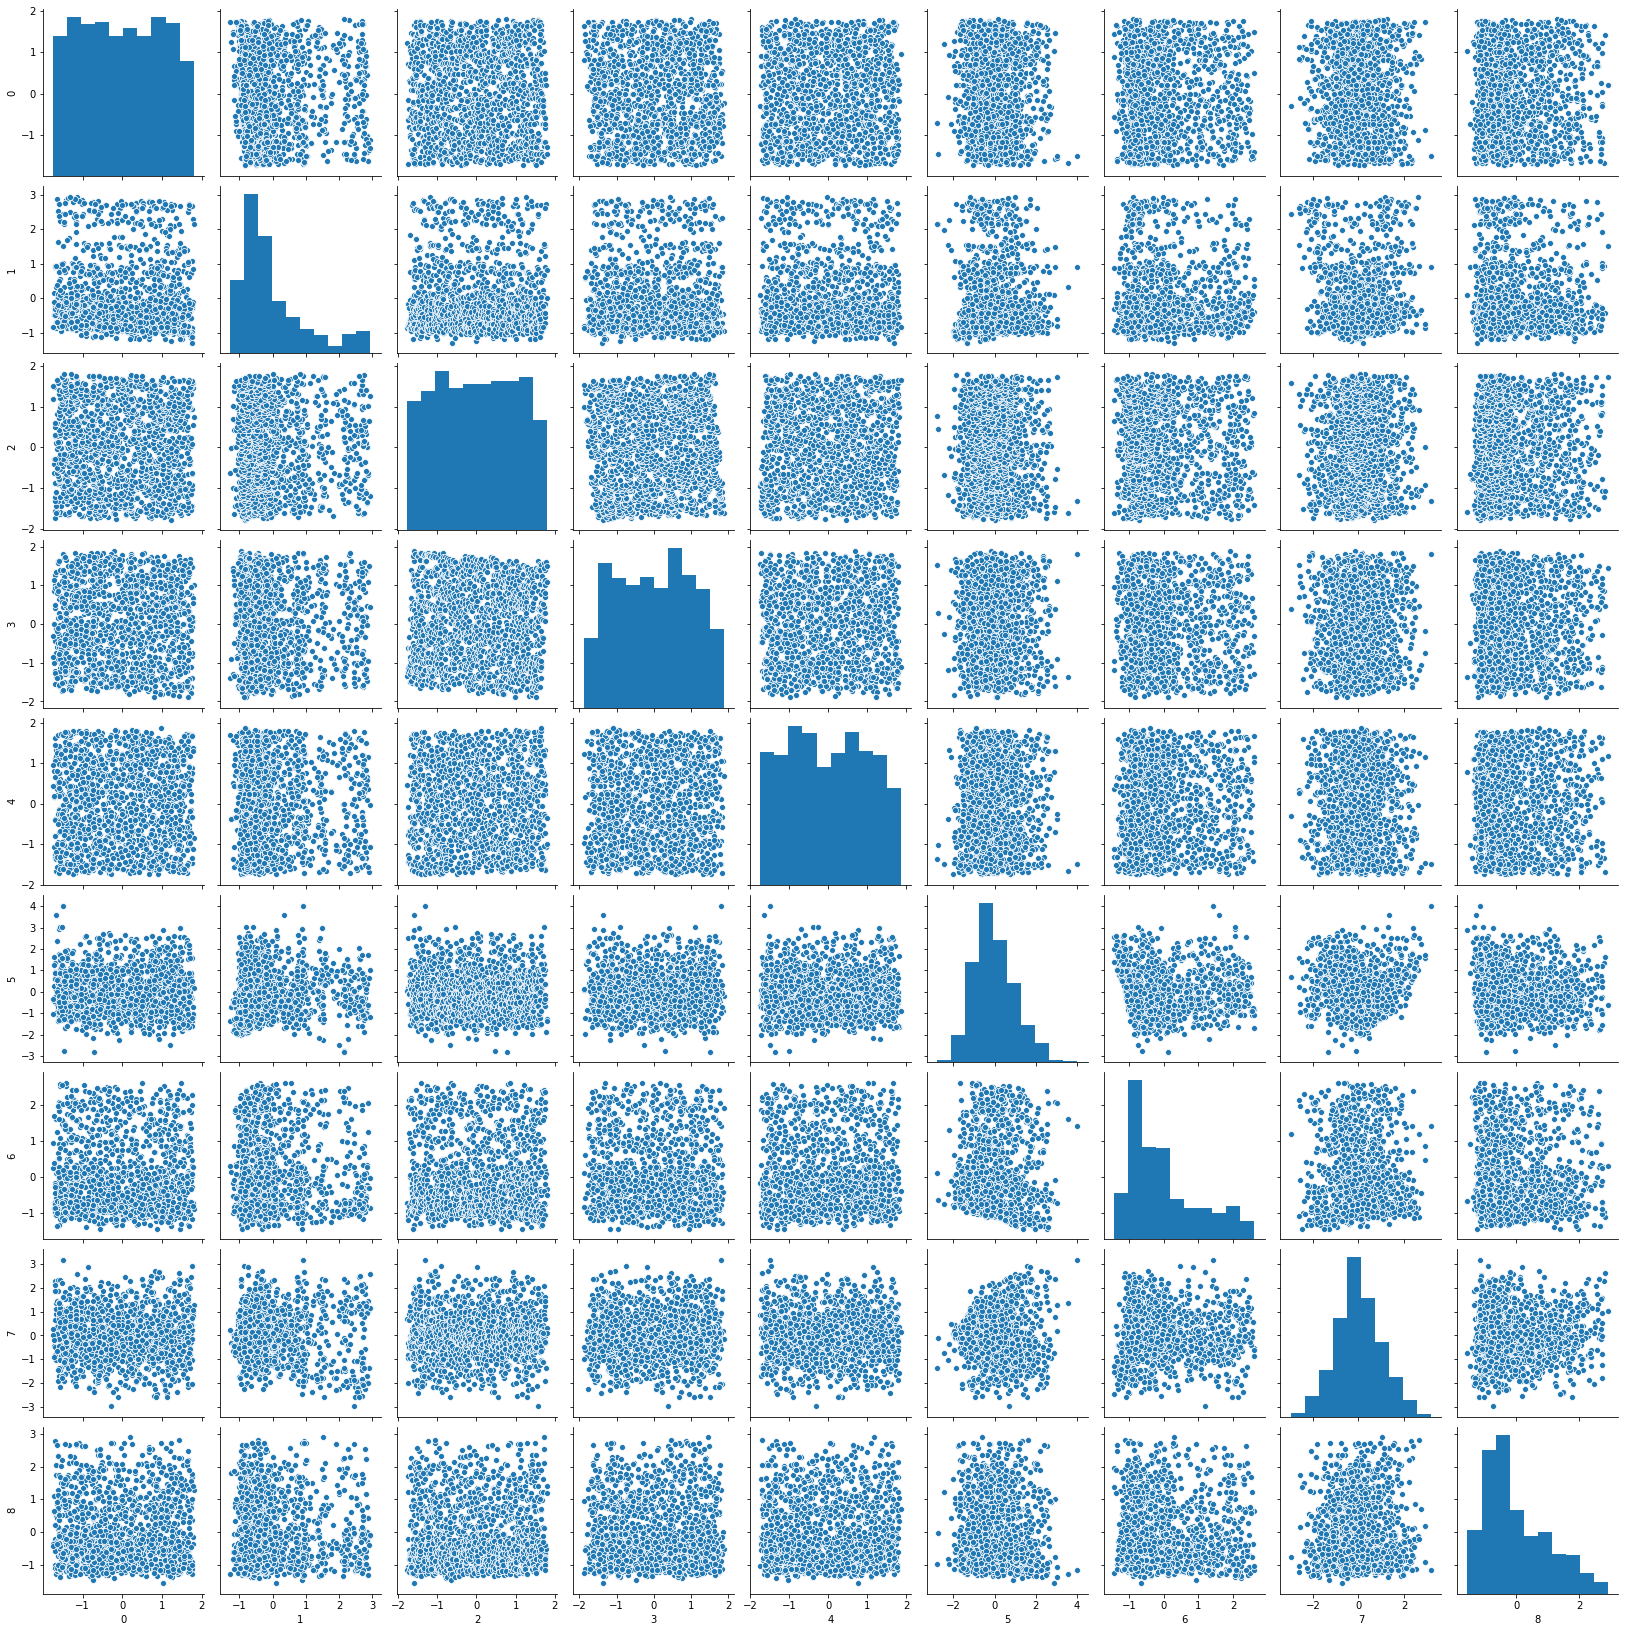

In [42]:
sns.pairplot(x)

In [43]:
#removing outliers from the data

In [44]:
from scipy.stats import zscore

In [45]:
z=np.abs(zscore(x))

In [46]:
print(np.where(z>3))

(array([  63,  126,  126,  523, 1444], dtype=int64), array([5, 5, 7, 5, 5], dtype=int64))


In [47]:
x_new=x[(z<3).all(axis=1)]

In [48]:
x_new.shape

(1466, 9)

In [49]:
x.shape

(1470, 9)

In [50]:
#implementing using logistic regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [52]:
max_acc_score=0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc_score=accuracy_score(pred,y_test)
    print("accuracy score corrosponding to random state:",r_state,"is:",acc_score)
    if acc_score>max_acc_score:
        max_acc_score=acc_score
        final_r_state=r_state
print()
print()
print("the max accuracy score for final random state",final_r_state,"is:",max_acc_score)

accuracy score corrosponding to random state: 42 is: 0.8673469387755102
accuracy score corrosponding to random state: 43 is: 0.7925170068027211
accuracy score corrosponding to random state: 44 is: 0.8469387755102041
accuracy score corrosponding to random state: 45 is: 0.8061224489795918
accuracy score corrosponding to random state: 46 is: 0.8095238095238095
accuracy score corrosponding to random state: 47 is: 0.8435374149659864
accuracy score corrosponding to random state: 48 is: 0.8367346938775511
accuracy score corrosponding to random state: 49 is: 0.8367346938775511
accuracy score corrosponding to random state: 50 is: 0.8197278911564626
accuracy score corrosponding to random state: 51 is: 0.8435374149659864
accuracy score corrosponding to random state: 52 is: 0.8571428571428571
accuracy score corrosponding to random state: 53 is: 0.8537414965986394
accuracy score corrosponding to random state: 54 is: 0.8333333333333334
accuracy score corrosponding to random state: 55 is: 0.884353741

In [53]:
#implementing using other classification algorithms to check whether accuracy score will increase or not

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [55]:
model=[GaussianNB(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier()]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=57,test_size=0.20)
for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i,"score",accuracy_score(y_test,pred))
    print(i,"report",classification_report(y_test,pred))
    print(i,"matrix",confusion_matrix(y_test,pred))

GaussianNB(priors=None, var_smoothing=1e-09) score 0.8673469387755102
GaussianNB(priors=None, var_smoothing=1e-09) report               precision    recall  f1-score   support

           0       0.87      1.00      0.93       254
           1       1.00      0.03      0.05        40

    accuracy                           0.87       294
   macro avg       0.93      0.51      0.49       294
weighted avg       0.89      0.87      0.81       294

GaussianNB(priors=None, var_smoothing=1e-09) matrix [[254   0]
 [ 39   1]]
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') score 0.8571428571428571
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') report               precision    recall  f1-score   support

           0   

In [57]:
#checking the score using cross valid score where the data is trained into different phases

In [58]:
from sklearn.model_selection import cross_val_score  

In [59]:
score=cross_val_score(SVC(),x,y,cv=5)

In [60]:
score

array([0.83673469, 0.83673469, 0.84013605, 0.84013605, 0.84013605])

In [61]:
score1=cross_val_score(DecisionTreeClassifier(),x,y,cv=5)

In [62]:
score1

array([0.68367347, 0.72108844, 0.74489796, 0.75510204, 0.75170068])

In [64]:
score2=cross_val_score(lg,x,y,cv=5)

In [65]:
score2

array([0.83673469, 0.83673469, 0.84013605, 0.83673469, 0.84013605])

In [66]:
#boosting the result 

In [67]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [68]:
rd=RandomForestClassifier()

In [69]:
rd.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [70]:
predrd=rd.predict(x_test)

In [71]:
accuracy_score(y_test,predrd)

0.8707482993197279

In [72]:
gd=GradientBoostingClassifier(learning_rate=0.1)

In [73]:
gd.fit(x_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [74]:
predgd=gd.predict(x_test)

In [75]:
accuracy_score(predgd,y_test)

0.8639455782312925

In [76]:
#using hyper parameter for SVC

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
attr={'kernel':['poly','linear','rbf'],'C':[1,0,10]}

In [79]:
gd=GridSearchCV(estimator=SVC(),param_grid=attr)

In [80]:
gd.fit(x,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 0, 10], 'kernel': ['poly', 'linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [81]:
gd.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [82]:
gd.best_params_

{'C': 1, 'kernel': 'poly'}

In [83]:
gd.best_score_

0.8387755102040817

In [84]:
#using hyperparameter for KNN

In [85]:
param={'n_neighbors':[3,5,7]}

In [86]:
gd1=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param)

In [87]:
gd1.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [88]:
gd1.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [89]:
gd1.best_params_

{'n_neighbors': 7}

In [90]:
gd1.best_score_

0.8137756941940136

In [91]:
#finalizing the above model for prediction and saving the result in csv form

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=55,test_size=0.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
pred=lg.predict(x_test)
hrcsv=pd.DataFrame(data=pred)
hrcsv.to_csv('hr attrition result.csv')

In [94]:
accuracy_score(y_test,pred)

0.8843537414965986

In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       260
           1       0.00      0.00      0.00        34

    accuracy                           0.88       294
   macro avg       0.44      0.50      0.47       294
weighted avg       0.78      0.88      0.83       294



In [96]:
print(confusion_matrix(y_test,pred))

[[260   0]
 [ 34   0]]


In [97]:
#plotting the auc roc curve

In [98]:
from sklearn.metrics import roc_auc_score,roc_curve

In [100]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.17529507, 0.23879319, 0.23791818, 0.06700946, 0.15785928,
       0.25218713, 0.14774481, 0.14609014, 0.12641253, 0.21707521,
       0.17034811, 0.18333974, 0.27757966, 0.28587033, 0.25571027,
       0.42570732, 0.07709085, 0.42480132, 0.16255154, 0.01069454,
       0.18765568, 0.24678625, 0.09251439, 0.20225577, 0.09522785,
       0.25510367, 0.16044074, 0.21921239, 0.13263627, 0.12218188,
       0.26261231, 0.1673807 , 0.27967438, 0.18222455, 0.38566806,
       0.31061132, 0.21409472, 0.23148316, 0.39530218, 0.17559544,
       0.15993104, 0.24437836, 0.31006601, 0.04782206, 0.43333161,
       0.03101114, 0.15280803, 0.18156106, 0.19979621, 0.0435504 ,
       0.1754429 , 0.1392702 , 0.13674237, 0.16650637, 0.36629083,
       0.27795392, 0.08411669, 0.22347302, 0.22739122, 0.12928586,
       0.09283764, 0.21041206, 0.05651883, 0.21234847, 0.15385882,
       0.03825101, 0.1244435 , 0.11019708, 0.14194602, 0.26457702,
       0.13260228, 0.21747193, 0.10994743, 0.22204494, 0.13833

In [101]:
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)

In [102]:
print("fpr is:",fpr)
print("tpr is:",tpr)
print("threshold is",threshold)

fpr is: [0.         0.00384615 0.00769231 0.00769231 0.01538462 0.01538462
 0.04615385 0.04615385 0.05384615 0.05384615 0.06923077 0.06923077
 0.07307692 0.07307692 0.08846154 0.08846154 0.1        0.1
 0.11538462 0.11538462 0.24615385 0.24615385 0.27307692 0.27307692
 0.27692308 0.27692308 0.28461538 0.28461538 0.32692308 0.32692308
 0.33076923 0.33076923 0.36923077 0.36923077 0.37307692 0.37307692
 0.39230769 0.39230769 0.46538462 0.46538462 0.48076923 0.48076923
 0.48461538 0.48461538 0.51538462 0.51538462 0.53461538 0.53461538
 0.58076923 0.58076923 0.75       0.75       0.75384615 0.75384615
 0.84230769 0.84230769 0.86923077 0.86923077 0.91923077 0.91923077
 0.98461538 0.98461538 1.        ]
tpr is: [0.         0.         0.         0.02941176 0.02941176 0.05882353
 0.05882353 0.11764706 0.11764706 0.17647059 0.17647059 0.20588235
 0.20588235 0.23529412 0.23529412 0.26470588 0.26470588 0.29411765
 0.29411765 0.35294118 0.35294118 0.38235294 0.38235294 0.41176471
 0.41176471 0.4411

In [104]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)

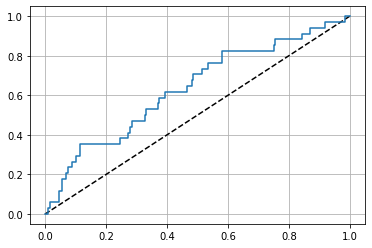

In [105]:
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr)
plt.grid()

In [106]:
auc_score=roc_auc_score(y_test,predlr)
auc_score

0.5

In [107]:
#plotting the curve for KNN

In [108]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predk=knn.predict(x_test)

In [109]:
y_pred_prob=knn.predict_proba(x_test)[:,0]

In [110]:
tpr,fpr,threshold=roc_curve(y_test,y_pred_prob)

In [111]:
print(tpr,fpr,threshold)

[0.         0.43461538 0.81538462 0.96153846 0.99230769 1.        ] [0.         0.47058824 0.67647059 0.91176471 1.         1.        ] [2.  1.  0.8 0.6 0.4 0. ]


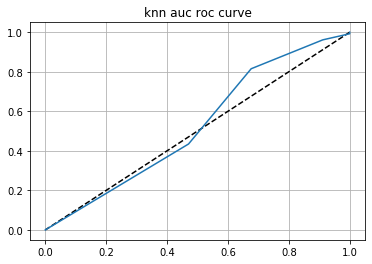

In [112]:
plt.plot([1,0],[1,0],'k--')
plt.plot(fpr,tpr)
plt.title("knn auc roc curve")
plt.grid()

In [113]:
#so from the above implementation we can conclude that logistic regression suits best for the above dataset
#so we will finally save the logistic regression model with 88% of accuracy score using serialization

In [ ]:
from sklearn.externals import joblib

In [ ]:
joblib.dump(lr,'hr_attrition_log_reg')